In [1]:
import os
import json
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
from huggingface_hub import snapshot_download
ROOT_DIR = "/home/data/pace"

/home/dhoban/RIPS25-AnalogDevices-ObjectDetection/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# repo_id = "qq456cvb/PACE"  # Replace with the actual dataset ID
# local_dir = "."  # The local path where you want to save the folder
# allow_patterns = ["model_splits/*"] # To download a specific folder within the dataset

# snapshot_download(repo_id=repo_id, local_dir=local_dir, allow_patterns=allow_patterns, repo_type="dataset")

In [3]:
len(glob.glob(f'{ROOT_DIR}/test/*')), len(glob.glob(f'{ROOT_DIR}/val_inst/*')), len(glob.glob(f'{ROOT_DIR}/val_pbr_cat/*'))

(240, 60, 10)

In [95]:
### data[video_id][frame_id]: set of all instances (IDs) in that frame (of that video)

In [4]:
data = dict()

all_categories = ['_'.join(x.split('/')[-1].split('_')[:-1]) for x in glob.glob(f'{ROOT_DIR}/model_splits/category/*_train.txt')]
all_categories.sort()

data = dict()
for video_path in glob.glob(f'{ROOT_DIR}/test/*')+glob.glob(f'{ROOT_DIR}/val_inst/*'): #+glob.glob(f'{ROOT_DIR}/val_pbr_cat/*'):
	print(video_path)
	video_id = int(video_path.split('/')[-1])
	frame_ids = [int(f.split('/')[-1].split('.')[0]) for f in glob.glob(f'{video_path}/rgb/*')]
	# print(f'Number of frames: {len(frame_ids)}')
	data[video_id] = {frame_id: set() for frame_id in frame_ids}
		
	json_file = f'{video_path}/scene_gt_coco_det_modal_inst.json'
	with open(json_file, 'r') as f:
		video_json = json.load(f)

	for anno in video_json['annotations']:
		object_instance_id = anno['category_id']
		frame_id = anno['image_id']
		data[video_id][frame_id].add(object_instance_id)

/home/data/pace/test/000249
/home/data/pace/test/000195
/home/data/pace/test/000160
/home/data/pace/test/000207
/home/data/pace/test/000132
/home/data/pace/test/000223
/home/data/pace/test/000242
/home/data/pace/test/000254
/home/data/pace/test/000048
/home/data/pace/test/000210
/home/data/pace/test/000144
/home/data/pace/test/000080
/home/data/pace/test/000015
/home/data/pace/test/000150
/home/data/pace/test/000086
/home/data/pace/test/000246
/home/data/pace/test/000149
/home/data/pace/test/000231
/home/data/pace/test/000173
/home/data/pace/test/000252
/home/data/pace/test/000053
/home/data/pace/test/000197
/home/data/pace/test/000205
/home/data/pace/test/000193
/home/data/pace/test/000250
/home/data/pace/test/000151
/home/data/pace/test/000038
/home/data/pace/test/000025
/home/data/pace/test/000125
/home/data/pace/test/000065
/home/data/pace/test/000161
/home/data/pace/test/000009
/home/data/pace/test/000026
/home/data/pace/test/000163
/home/data/pace/test/000008
/home/data/pace/test

# PACE Statistics

Total number of frames: 54945


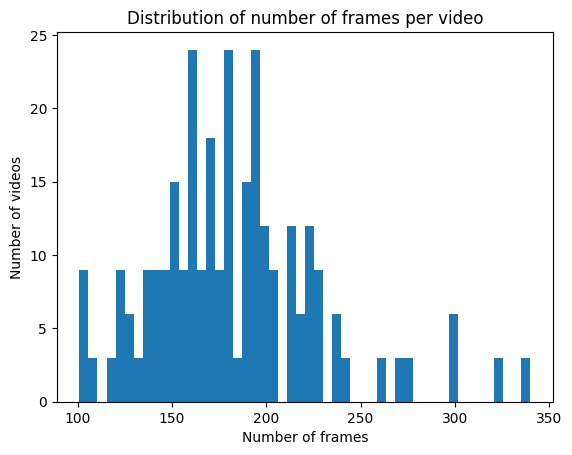

In [5]:
# plot the distribution of number of frames per video
video_lengths = [len(frames) for frames in data.values()]
print(f'Total number of frames: {sum(video_lengths)}')
plt.hist(video_lengths, bins=50)
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.title('Distribution of number of frames per video')
plt.show()

In [6]:
instances_of_category = dict()
for category in all_categories:
	test_instance_ids = [int(x.split('_')[-1]) for x in open(f'{ROOT_DIR}/model_splits/category/{category}_test.txt', 'r').read().splitlines()]
	val_instance_ids = [int(x.split('_')[-1]) for x in open(f'{ROOT_DIR}/model_splits/category/{category}_val.txt', 'r').read().splitlines()]
	instances_of_category[category] = test_instance_ids + val_instance_ids
	print(f'Processing category: {category}, with instances: {instances_of_category[category]}')

Processing category: bottle, with instances: [2, 3, 5, 6, 16, 20, 21, 24, 4, 705, 14, 18, 694, 15, 11, 700]
Processing category: bowl, with instances: [40, 36, 38, 735, 739, 43, 722, 734, 30, 42, 728, 720]
Processing category: box-base_link, with instances: [579, 558, 593, 595, 603, 554, 572, 591, 608, 548]
Processing category: box-link1, with instances: [578, 557, 592, 594, 602, 553, 571, 590, 607, 547]
Processing category: brush, with instances: [49, 50, 51, 55, 56, 48, 53]
Processing category: can, with instances: [66, 70, 71, 73, 74, 57, 58, 61, 62, 63, 59, 758, 764, 72, 761, 766, 778]
Processing category: chip_can, with instances: [75, 76, 77, 78, 79, 81, 82, 789]
Processing category: clip-link1, with instances: [610, 628, 618, 632]
Processing category: clip-link2, with instances: [609, 627, 617, 631]
Processing category: clock, with instances: [93, 85, 87, 88, 797, 90, 808, 792, 89]
Processing category: container, with instances: [96, 97, 95, 823, 829, 825, 815]
Processing catego

In [7]:
# show histogram of number of unique instances that appear in each video (for however many frames)
all_instances = []
for cat in instances_of_category:
	all_instances.extend(instances_of_category[cat])

In [8]:
print(f'Total number of unique instances: {len(set(all_instances))}')

Total number of unique instances: 396


In [9]:
instances_of_category['hammer']

[105, 109, 108, 857, 861, 853, 850, 856]

In [10]:
import numpy as np

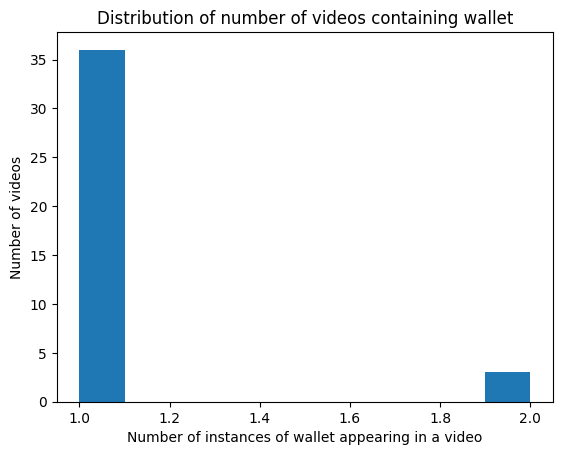

In [11]:
chosen_category = 'wallet'
chosen_instances = instances_of_category[chosen_category]
# toothbrush, wallet, can
# for each video, count how many different chosen instances show up at all (even if not in every frame)
chosen_counts = defaultdict(int)
for video_id, frames in data.items():
	for chosen_instance in chosen_instances:
		if any(chosen_instance in frames[frame_id] for frame_id in frames):
			chosen_counts[video_id] += 1

plt.hist(list(chosen_counts.values()), align='mid')
plt.xlabel(f'Number of instances of {chosen_category} appearing in a video')
plt.ylabel('Number of videos')
plt.title(f'Distribution of number of videos containing {chosen_category}')
plt.show()

Found instance ID: 544 in video ID: 190
Found instance ID: 544 in video ID: 191
Found instance ID: 544 in video ID: 189
Found instance ID: 544 in video ID: 103
Found instance ID: 544 in video ID: 102
Found instance ID: 544 in video ID: 104
Found instance ID: 533 in video ID: 140
Found instance ID: 533 in video ID: 138
Found instance ID: 533 in video ID: 219
Found instance ID: 533 in video ID: 139
Found instance ID: 533 in video ID: 221
Found instance ID: 533 in video ID: 220
Found instance ID: 534 in video ID: 239
Found instance ID: 534 in video ID: 238
Found instance ID: 534 in video ID: 237
Found instance ID: 535 in video ID: 75
Found instance ID: 535 in video ID: 77
Found instance ID: 535 in video ID: 76
Found instance ID: 535 in video ID: 103
Found instance ID: 535 in video ID: 102
Found instance ID: 535 in video ID: 104
Found instance ID: 538 in video ID: 56
Found instance ID: 538 in video ID: 55
Found instance ID: 538 in video ID: 54
Found instance ID: 539 in video ID: 45
Found i

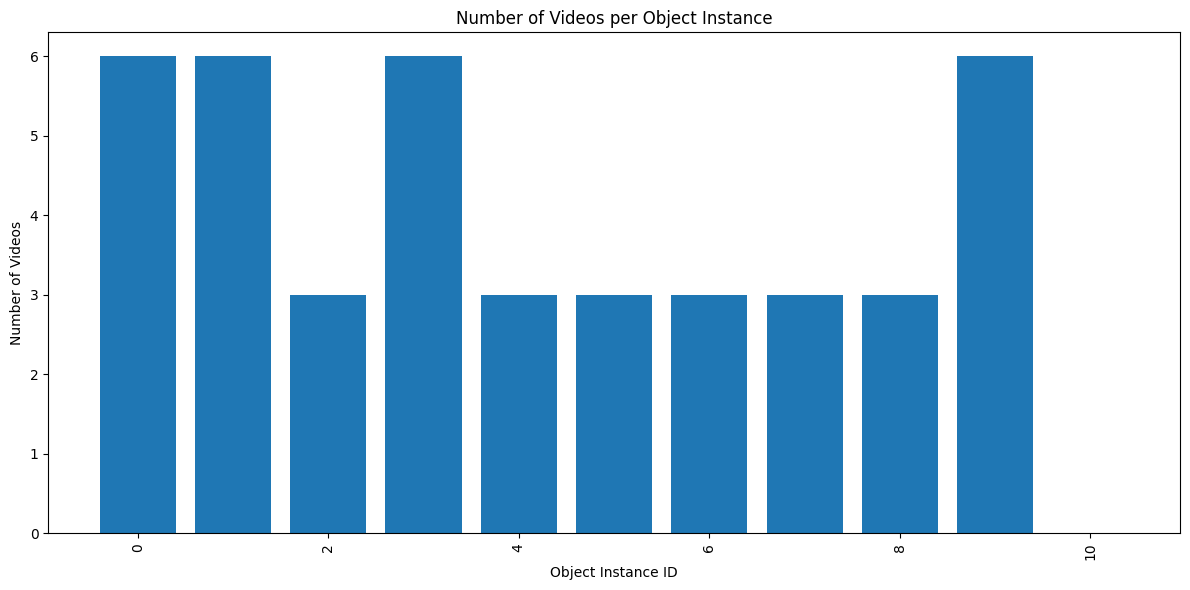

In [12]:
# for each object instance, plot how many videos it appears in (even if it appears in only one frame)
# plot object instance ID on the x axis, and number of videos it appears in on the y axis
# sort from most to least number of videos
instance_video_count = {instance_id: 0 for instance_id in instances_of_category[chosen_category]}
for instance_id in instance_video_count:
	for video_id, frames in data.items():
		if any(instance_id in frames[frame_id] for frame_id in frames):
			print(f"Found instance ID: {instance_id} in video ID: {video_id}")
			instance_video_count[instance_id] += 1

# sort the bars by number of videos
# instance_video_count = dict(sorted(instance_video_count.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(instance_video_count.keys())), instance_video_count.values())
plt.xlabel('Object Instance ID')
plt.ylabel('Number of Videos')
plt.title('Number of Videos per Object Instance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
len(all_categories)

47

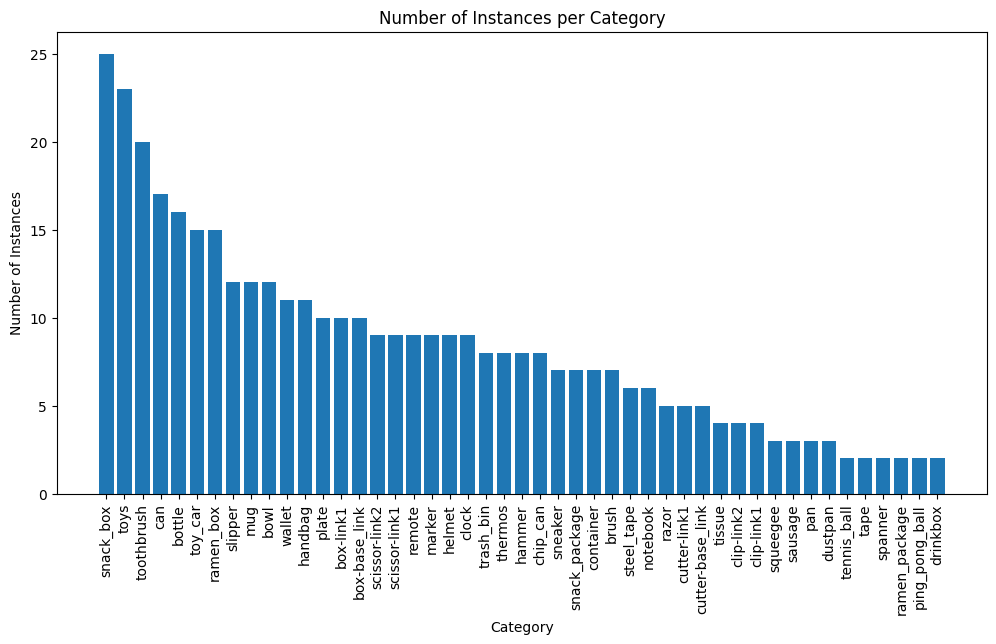

In [14]:
## make histogram of instaces per category
instances_counts = [len(instances_of_category[category]) for category in all_categories]

# sort categories by number of instances
sorted_categories = [x for _, x in sorted(zip(instances_counts, all_categories), reverse=True)]
sorted_counts = sorted(instances_counts, reverse=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_categories, sorted_counts)
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances per Category')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

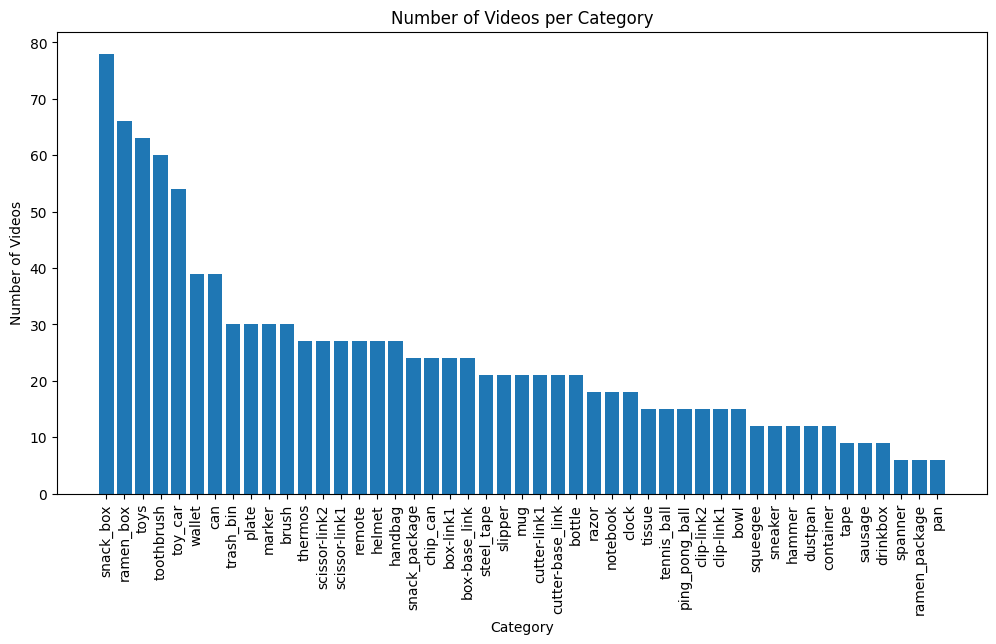

In [15]:
# plot number of videos that each category occurs in
category_video_counts = defaultdict(int)
for category in all_categories:
	for video_id, frames in data.items():
		foundCategoryInVideo = False
		for frame_id, object_instances in frames.items():
			for instance_id in object_instances:
				if instance_id in instances_of_category[category]:
					category_video_counts[category] += 1
					foundCategoryInVideo = True
					break
			if foundCategoryInVideo:
				break

# plot number of videos that each category occurs in
sorted_categories = [x for _, x in sorted(zip(category_video_counts.values(), category_video_counts.keys()), reverse=True)]
sorted_counts = sorted(category_video_counts.values(), reverse=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_categories, sorted_counts)
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.title(f'Number of Videos per Category')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

In [16]:
# for each chosen instance, find all videos that contain it, and all other instances that appear in those videos

video_groups = []

for chosen_instance in chosen_instances:
	found_in_group = False
	for group in video_groups:
		if chosen_instance in group['instances']:
			found_in_group = True
	if not found_in_group:
		new_group = {'video_ids': [], 'instances': []}
		for video_id, frames in data.items():
			if any(chosen_instance in frames[frame_id] for frame_id in frames):
				new_group['video_ids'].append(video_id)
				for other_instance in instances_of_category[chosen_category]:
					if other_instance not in new_group['instances'] and any(other_instance in frames[frame_id] for frame_id in frames):
						new_group['instances'].append(other_instance)
		video_groups.append(new_group)

for group in video_groups:
	print(f'Video group with {len(group["video_ids"])} videos and {len(group["instances"])} instances:')
	print(f'Video IDs: {group["video_ids"]}')
	print(f'Instances: {group["instances"]}')
	print(f'Total frames in group: {sum(len(data[video_id]) for video_id in group["video_ids"])}')
	print('---')

Video group with 6 videos and 2 instances:
Video IDs: [190, 191, 189, 103, 102, 104]
Instances: [544, 535]
Total frames in group: 837
---
Video group with 6 videos and 1 instances:
Video IDs: [140, 138, 219, 139, 221, 220]
Instances: [533]
Total frames in group: 1143
---
Video group with 3 videos and 1 instances:
Video IDs: [239, 238, 237]
Instances: [534]
Total frames in group: 714
---
Video group with 3 videos and 1 instances:
Video IDs: [56, 55, 54]
Instances: [538]
Total frames in group: 303
---
Video group with 3 videos and 1 instances:
Video IDs: [45, 46, 47]
Instances: [539]
Total frames in group: 321
---
Video group with 3 videos and 1 instances:
Video IDs: [193, 192, 194]
Instances: [540]
Total frames in group: 420
---
Video group with 3 videos and 1 instances:
Video IDs: [210, 211, 212]
Instances: [541]
Total frames in group: 366
---
Video group with 3 videos and 1 instances:
Video IDs: [207, 209, 208]
Instances: [542]
Total frames in group: 657
---
Video group with 6 videos 

In [17]:
val_videos = {190, 191, 189, 103, 102, 104, 140, 138, 219, 139, 221, 220, 239, 238, 237, 56, 55, 54, 45, 46, 47}
val_instances_wallets = {544, 535, 533, 534, 538, 539}

train_videos = {207, 209, 208, 181, 180, 182, 214, 215, 213}
train_instances_wallets = {542, 543}

test_videos = {193, 192, 194, 210, 211, 212}
test_instances_wallets = {540, 541}

assert train_videos.isdisjoint(val_videos)
assert train_videos.isdisjoint(test_videos)
assert val_videos.isdisjoint(test_videos)
assert train_instances_wallets.isdisjoint(val_instances_wallets)
assert train_instances_wallets.isdisjoint(test_instances_wallets)
assert val_instances_wallets.isdisjoint(test_instances_wallets)

val_videos = val_videos.union({45, 46, 47, 48, 50, 49, 53, 51, 52, 68, 67, 66, 97, 96, 98, 73, 72, 74, 95, 94, 93, 0, 2, 1})
val_instances_can = {66, 70, 71, 74, 74, 57}

train_videos = train_videos.union({32, 30, 31, 22, 21, 23, 41, 39, 40})
train_instances_can = {62, 63}

test_videos = test_videos.union({25, 26, 24, 3, 4, 5})
test_instances_can = {58, 61}

wallet_instances = val_instances_wallets.union(train_instances_wallets).union(test_instances_wallets)
can_instances = val_instances_can.union(train_instances_can).union(test_instances_can)

assert train_videos.isdisjoint(val_videos)
assert train_videos.isdisjoint(test_videos)
assert val_videos.isdisjoint(test_videos)
assert train_instances_can.isdisjoint(val_instances_can)
assert train_instances_can.isdisjoint(test_instances_can)
assert val_instances_can.isdisjoint(test_instances_can)

print(f'Train videos: {len(train_videos)}, Train instances: {len(train_instances_wallets.union(train_instances_can))}')
print(f'Val videos: {len(val_videos)}, Val instances: {len(val_instances_wallets.union(val_instances_can))}')
print(f'Test videos: {len(test_videos)}, Test instances: {len(test_instances_wallets.union(test_instances_can))}')

Train videos: 18, Train instances: 4
Val videos: 42, Val instances: 11
Test videos: 12, Test instances: 4


# Dataset Processing

In [26]:
def convert_bbox_to_yolo(bbox, img_width, img_height):
    """
    Convert bounding box from [x, y, width, height] format to YOLO format
    [x_center, y_center, width, height] normalized by image dimensions
    """
    x, y, w, h = bbox
    x_center = (x + w/2) / img_width
    y_center = (y + h/2) / img_height
    norm_width = w / img_width
    norm_height = h / img_height
    return x_center, y_center, norm_width, norm_height

def process_annotation_file(json_file_path):
    """
    Process a video annotation file and convert to YOLO format
    Returns a dictionary mapping frame_id to list of YOLO format annotations
    """
    with open(json_file_path, 'r') as f:
        annotations = json.load(f)['annotations']
    
    frame_annotations = defaultdict(list)
    
    for anno in annotations:
        # if anno.get('ignore', False):  # Skip ignored annotations
        #     print(f"Skipping ignored annotation: {anno}")
        #     if anno['category_id'] in wallet_instances.union(can_instances):
        #         print('can or wallet skipped')
        #     continue
            
        frame_id = anno['image_id']
        class_id = anno['category_id']
        bbox = anno['bbox']  # [x, y, width, height]
        img_width = anno['width']
        img_height = anno['height']
        
        # Convert to YOLO format
        x_center, y_center, norm_width, norm_height = convert_bbox_to_yolo(bbox, img_width, img_height)
        
        yolo_annotation = {
            'class_id': class_id,
            'x_center': x_center,
            'y_center': y_center,
            'width': norm_width,
            'height': norm_height
        }
        
        frame_annotations[frame_id].append(yolo_annotation)
    
    return frame_annotations


In [ ]:
# Example usage with the sample annotation file
json_path = "/home/data/pace/test/000000/scene_gt_coco_det_modal_inst.json"
sample_labels = process_annotation_file(json_path)

# Display results
for frame_id, labels in sample_labels.items():
    print(f"Frame {frame_id}:")
    for label in labels:
        print(f"  Class Instance {label['class_id']}: x_center={label['x_center']:.4f}, y_center={label['y_center']:.4f}, width={label['width']:.4f}, height={label['height']:.4f}")
    print()

In [ ]:
sample_labels[0]

In [ ]:
# Write sample_labels into a text file in darknet format
for frame_id, labels in sample_labels.items():
    with open(f'{ROOT_DIR}/sample_labels/{str(frame_id).zfill(6)}.txt', 'w', encoding='utf-8') as f:
        for label in labels:
            # category = [cat for cat in instance_ids if label['class_id'] in instance_ids[cat]][0]  # Get category name from class_id
            f.write(f"{label['class_id']} {label['x_center']} {label['y_center']} {label['width']} {label['height']}\n")

In [34]:
# Create train, val, test splits for toothbrushes and cans
# wallet : 0
# can : 1

for video_path in glob.glob(f'{ROOT_DIR}/test/*')+glob.glob(f'{ROOT_DIR}/val_inst/*'):
    video_id = int(video_path.split('/')[-1])
    if video_id in train_videos:
        split = 'train'
    elif video_id in val_videos:
        split = 'val'
    elif video_id in test_videos:
        split = 'test'
    else:
        continue

    if not os.path.exists(f'{ROOT_DIR}/wallet_can_v0/{split}/images/'):
        os.makedirs(f'{ROOT_DIR}/wallet_can_v0/{split}/images/')
    if not os.path.exists(f'{ROOT_DIR}/wallet_can_v0/{split}/labels/'):
        os.makedirs(f'{ROOT_DIR}/wallet_can_v0/{split}/labels/')
    
    for frame_id in glob.glob(f'{video_path}/rgb/*'):
        pass
        # print(f"cp {frame_id} {ROOT_DIR}/wallet_can_v0/{split}/{str(video_id)}/{video_id}_{os.path.basename(frame_id)}")
        os.system(f"cp {frame_id} {ROOT_DIR}/wallet_can_v0/{split}/images/{str(video_id)}_{int(os.path.basename(frame_id).split('.')[0])}.png")

    labels = process_annotation_file(f'{video_path}/scene_gt_coco_det_modal_inst.json')
    for frame_id, labels_list in labels.items():
        for label in labels_list:
            file = f"{ROOT_DIR}/wallet_can_v0/{split}/labels/{str(video_id)}_{frame_id}.txt"
            if label['class_id'] in wallet_instances:
                class_id = 0
                with open(file, 'a') as f:
                    # print(f"{class_id} {label['x_center']} {label['y_center']} {label['width']} {label['height']}\n")
                    f.write(f"{class_id} {label['x_center']} {label['y_center']} {label['width']} {label['height']}\n")
            elif label['class_id'] in can_instances:
                class_id = 1
                with open(file, 'a') as f:
                    # print(f"{class_id} {label['x_center']} {label['y_center']} {label['width']} {label['height']}\n")
                    f.write(f"{class_id} {label['x_center']} {label['y_center']} {label['width']} {label['height']}\n")